In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# establishing sqlite connection

In [2]:
import sqlite3

In [3]:
# here "con" is a connection object
con = sqlite3.connect("database.sqlite")

In [4]:
type(con)

sqlite3.Connection

In [5]:
df = pd.read_sql_query("SELECT * FROM REVIEWS",con)
# here df, the exctracted data from the database in in raw form- we need to do data cleaning methods to prepare 
# the data for analysis

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

From the amazon product reviews, the features "HelpfulnessNumerator" and "HelpfulnessDenominator" helps to observe the ratio of people who found the product review to be helpful or not helpful. 
--> Here, when numerator is the amount of responses regarding customers who found the reviews to be helpful. And denominator as customers who found the reviews to be not very helpful or has less significant impact on decision making. 

--> Thus, we try to find the rows where the impact is helpful and so, the rows should be having their numerators greater thna the denominators and otherwise is considered invalid

In [23]:
df_valid = df[df["HelpfulnessNumerator"] > df["HelpfulnessDenominator"]]
df_valid
# here valid are the items which have their HelpfulnessNumerator to be greater than HelpfulnessDenominator 
# And we observe the review to have an impact and thus as "valid" as per the analysis. 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [24]:
df_valid.shape

(2, 10)

--> Similarly, invalid are the items which have their HelpfulnessNumerator to be lesser than HelpfulnessDenominator 
And we observe the review to not have an impact and thus as "invalid" as per the analysis. 

In [21]:
df_invalid = df[df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]]
df_invalid

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [22]:
df_invalid.shape

(568452, 10)

--> We notice that the reviews (otherthan two as per data) have no absolute significant impact on the customer of particular product 

# For checking duplicate data

--> We put forward a condition where the features like "UserID", "Profilename", "Time" and "Text" cannot be same for multiple rows since one user cannot provide two or more reviews at exact same point of time 

In [26]:
df_transform = df_invalid

In [28]:
df_transform.duplicated(['UserId','ProfileName',"Time","Text"])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [30]:
# checking for the duplicate rows 

df_transform[df_transform.duplicated(['UserId','ProfileName',"Time","Text"])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


--> 174521 rows are retrieved as duplicates out of 568454 rows, now we drop these values for better analysis of our data. 

In [32]:
data = df_transform.drop_duplicates(subset = ['UserId','ProfileName',"Time","Text"])

In [34]:
data.shape
# This is the data without any duplicates

(393931, 10)

In [35]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

--> Time feature has an integer datatype instead of datetime , and let's convert it using datetime method of pandas 

In [36]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

--> By default, the unit parameter of the section of time is nanosecond .
Here it shows the default date as unix start time
-> Thus we need to get the unit parameter with seconds

In [37]:
pd.to_datetime(data['Time'], unit = "s")

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

# Analysing customers to recommend more products to? 

In general, amazon could recommend more products to customers who usually has a highly stabled purchasing history
--> Customers who previously searched for the same product before. 

In [38]:
# checking the total number of users using unique() function 

data["UserId"].nunique()

256059

We notice that there are 256059 unique user Id's of customers. Now we shall see who the top customers are in terms of products they buy, and we achieve it with the help of aggregate function on all the features provided in the dataset like "ProductID", "summary", "Text", "score" . That helps us get a single value for all the multiple entries of same users. 

In [43]:
recommend_df= data.groupby(["UserId"]).agg({"Summary":"count","Text":"count","Score":"mean","ProductId":"count"}).sort_values(\
                                                                       "ProductId", ascending = False)   
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [47]:
recommend_df.columns

Index(['Summary', 'Text', 'Score', 'ProductId'], dtype='object')

In [48]:
recommend_df.index

# gives the values of index 

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR',
       ...
       'A2E7WIBDJR18V8', 'A2E7XIUQEXY6C8', 'A2E7YXJ2QROHI2', 'A2E803BUUBT1E',
       'A2E80ET0YJ1GH6', 'A2E80MDB9TCNGW', 'A2E80RT3HOR35T', 'A2E816C5N51F6X',
       'A2E81TVIUZI1IC', 'AZZZOVIBXHGDR'],
      dtype='object', name='UserId', length=256059)

In [58]:
# let's now display the top 10 customers who purchased high number of products 
recommend_df[:10]

,Number_of_summaries,Num_of_texts,Mean_scores,Num_of_purchassed_products
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [62]:
recommend_df.columns = ["Number_of_summaries","Num_of_texts","Mean_scores","Num_of_purchased_products"]

In [63]:
recommend_df[:10]

,Number_of_summaries,Num_of_texts,Mean_scores,Num_of_purchased_products
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [66]:
recommend_df["Num_of_purchased_products"][0:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: Num_of_purchased_products, dtype: int64

In [84]:
# to get only users from the index of our dataframe
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [67]:
# Now we create a bar plot to visualize the top 30 users to recommend the product to 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

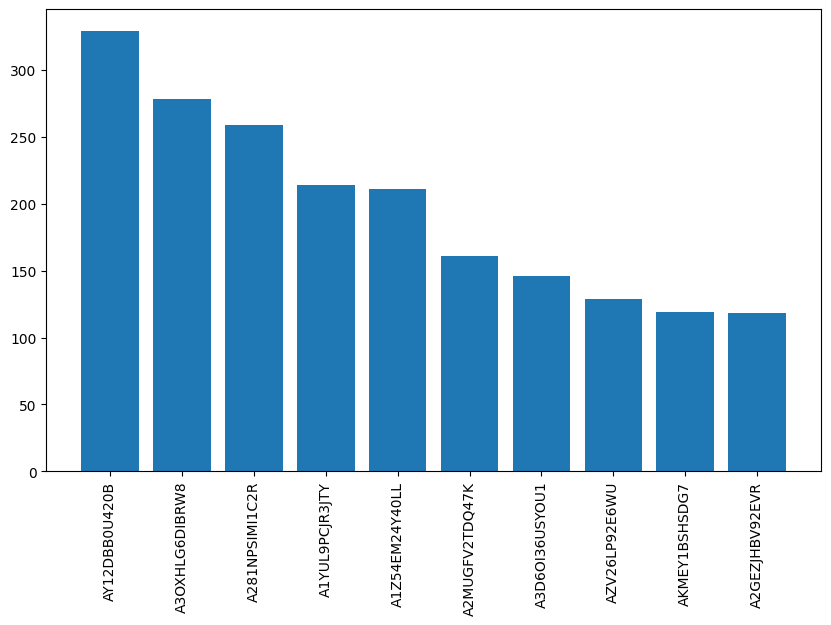

In [80]:
plt.figure(figsize = (10,6))
plt.bar(x = recommend_df.index[0:10],height = recommend_df["Num_of_purchased_products"][0:10].values,data = recommend_df )
plt.xticks(rotation = "vertical")

# which product has good number of reviews? 

Now we are analysing the products which have top most reviews ,( amazon's choice) to recommend to the user recommended column

In [87]:
# total products that we have in the dataset
len(data["ProductId"].unique())

67624

Now since the analysis is too complex for such large product size, let us filter the products to the frquently sold. Now we need to obtain a new feature frequently sold. We can do this by doing a count aggregate function on the productId

--> As for the threshold, we shall consider it after looking at the frequency table. ( usually after a few brainstorming session with the stakeholders/client)

In [88]:
data["ProductId"].value_counts()

B007JFMH8M    912
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    566
B0013NUGDE    558
             ... 
B002DNX4GO      1
B000FM2YU2      1
B001M1VA32      1
B009858H6M      1
B001LR2CU2      1
Name: ProductId, Length: 67624, dtype: int64

In [91]:
# obtaining a dataframe for the frequency of products getting sold
product_totals = data["ProductId"].value_counts().to_frame()
product_totals

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [93]:
product_totals[:40]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


We shall consider a number of 450 for now as a threshold for recommendation engine

In [94]:
product_totals["ProductId"]>450

B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: ProductId, Length: 67624, dtype: bool

In [95]:
product_totals[product_totals["ProductId"]>450]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [98]:
# retrieving only the ID's of the products - and we save it to a variable 
freq_prod_Ids= product_totals[product_totals["ProductId"]>450].index 
freq_prod_Ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4', 'B006MONQMC', 'B002IEZJMA', 'B000PDY3P0', 'B002IEVJRY',
       'B001VJ0B0I', 'B002LANN56', 'B004SRH2B6', 'B007TJGY46', 'B003VXFK44',
       'B0041NYV8E'],
      dtype='object')

 To get more Info on which products among these have more chances of orders and could look more attractive to users, we shall consider the scores/review scores of the products and draw a visualization 
 
 --> Now we shall take the Initially imported dataframe,"data" and apply the above created freq_prods_Ids with the help of isin() method and get the Information for only the rows with specified products

In [104]:
data['ProductId'].isin(freq_prod_Ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [105]:
freq_product_info = data[data["ProductId"].isin(freq_prod_Ids)]
freq_product_info

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
8284,8285,B003VXFK44,A5U24IWH64IFF,Kimdoll,1,1,5,1302480000,Absolutely delicious coffee!,"I am a huge coffee drinker, and love the k-cup..."
8285,8286,B003VXFK44,A1RVCWFP3SC3GU,Cakediva,1,1,5,1300233600,YUMMY,We always drink Timmothy's or Emeril's. Though...
8286,8287,B003VXFK44,A12SO47JRQGUPR,"Thomas Smith ""tjaye""",1,1,4,1299801600,Good Stuff,Good subtle flavored coffee for the mid-aftern...
8287,8288,B003VXFK44,A86RUZGD22FDR,Another coffee drinker,1,1,5,1299110400,Delivers what was promises,Wolfgang Puck's Chef's Reserve Colombian (Dark...
8288,8289,B003VXFK44,A3LQS08K2OBI5Z,J. Lim,1,1,3,1298332800,My mom said this was not as flavorful as other...,This is the most USEFUL info you will ever nee...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,1343520000,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,1343433600,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,1343433600,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...


<AxesSubplot: xlabel='count', ylabel='ProductId'>

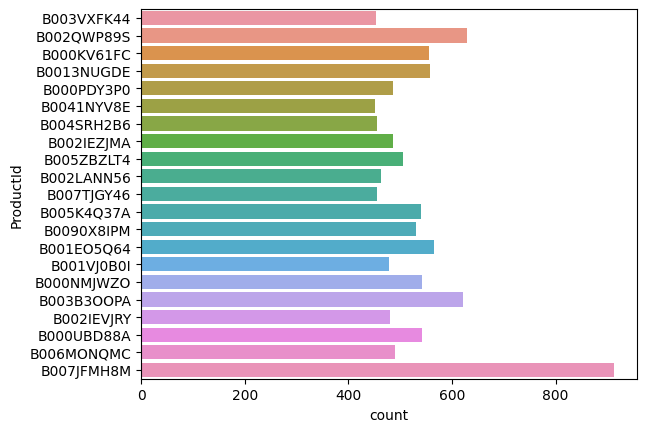

In [108]:
sns.countplot(y = "ProductId",data = freq_product_info)

In [109]:
# using "score" as a hue parameter

<AxesSubplot: xlabel='count', ylabel='ProductId'>

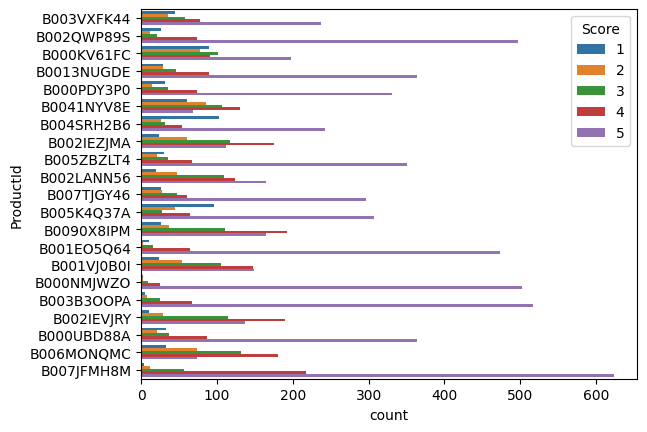

In [111]:
sns.countplot(y = "ProductId",data = freq_product_info,hue = "Score")

This helps further filter down the products having more than 200 values for a score of 5 or deduce the product with more score values of 1 and 2 

# Analyse if  there is any difference in the behaviour of frequent and infrequent buyers? 

In [112]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [121]:
Total_count = data["UserId"].value_counts()
Total_count

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

The number of products bought by the significant users. 

we shall foremost use a lambda function to establish a new feature "Buyer_type" from the data. Let us consider a threshold of 100 (in number of products) to show if a person is a "frequent" or "infrequent" buyer

In [125]:
 data["UserId"].apply(lambda user: "Frequent" if Total_count[user] >100 else "Not Frequent")

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: UserId, Length: 393931, dtype: object

In [128]:
data1 = data.copy()

In [130]:
data1["Buyer_type"] = data1["UserId"].apply(lambda user: "Frequent" if Total_count[user] >50 else "Not Frequent")
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [133]:
data1["Buyer_type"].value_counts()

Not Frequent    384573
Frequent          9358
Name: Buyer_type, dtype: int64

In [137]:
not_freq_df = data1[data1["Buyer_type"] == "Not Frequent"]
freq_df = data1[data1["Buyer_type"] == "Frequent"]

In [139]:
freq_df["Score"].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

In [140]:
# to get the score values for type of buyers, we use the follwing operation 
freq_df["Score"].value_counts()/len(freq_df) * 100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

In [141]:
not_freq_df["Score"].value_counts()/len(not_freq_df) * 100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

<AxesSubplot: >

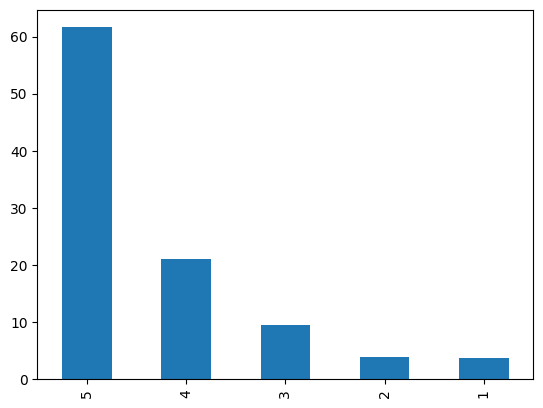

In [144]:
plot_freqent_buyers = (freq_df["Score"].value_counts()/len(freq_df)* 100).plot(kind = "bar")

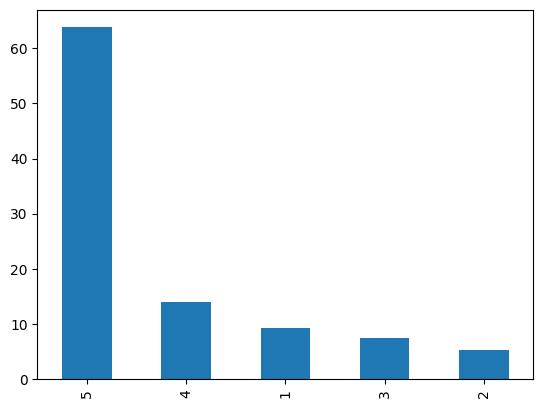

In [146]:
plot_not_frequent_buyers = (not_freq_df['Score'].value_counts()/len(not_freq_df)*100).plot(kind = "bar")

The above two plots concludes that there is no significant difference in the behaviour of users while giving reviews that differs the frequent buyers from non frequent buyers

# Analysing if frequent users are more verbose? 

--> Let us now analyse if frequent users post more reviews(give their opinion on the product during the reviews/ on social media)

In [147]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Buyer_type'],
      dtype='object')

In [148]:
data["Text"]

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [150]:
data[["UserId", "ProductId","Text"]]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [151]:
# Here's how we can get the total length of the "Text" feature values

In [156]:
data1["Text"][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [157]:
len(data["Text"][0].split(" "))

49

In [155]:
def calculate_length(text):
    return len(text.split(" "))

In [158]:
data1["Text_length"] = data1['Text'].apply(calculate_length)

In [159]:
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30


--> Here, we also need a dataframe for both frequent and non-frequent customers

In [161]:
not_freq_data = data1[data1["Buyer_type"]== "Not Frequent"]
freq_data = data1[data1["Buyer_type"]== "Frequent"]                  

In [162]:
not_freq_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30


In [163]:
freq_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type,Text_length
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent,22
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,Frequent,44
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...,Frequent,50
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,Frequent,134
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...,Frequent,47


Visualizing the boxplot for both frequent and not frequent users to see the five point summary of our data. Min, Max, Medien, 25th and 75th percentiles. 

Text(0.5, 0, 'Boxplot_Text_length for not frequent buyers')

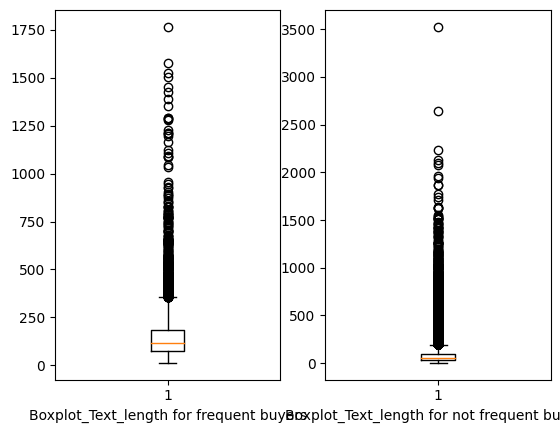

In [170]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(freq_data["Text_length"])
ax1.set_xlabel("Boxplot_Text_length for frequent buyers")

ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(not_freq_data["Text_length"])
ax2.set_xlabel("Boxplot_Text_length for not frequent buyers")

The above is the boxplot visualization obtained on plotting the Text_lengths of both frequent and non-frequent buyers. From the result, we can conclude that the frequent users indeed are more verbose compared to the non-frequnt buyers. However, to make the plot more clearer and effective, we shall reduce the amount of outliers ( also they make no difference for this part of analysis ) obtained using "set_lim" method on both the subplots.

(0.0, 600.0)

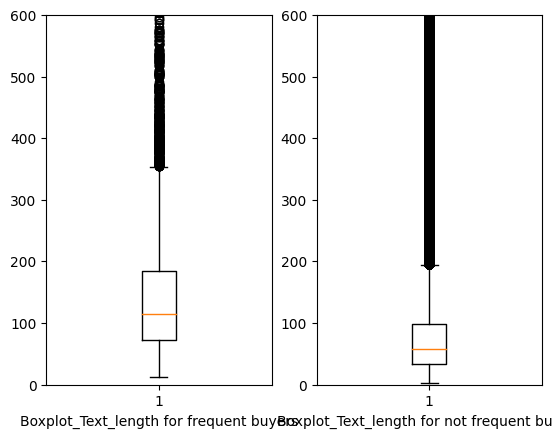

In [171]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(freq_data["Text_length"])
ax1.set_xlabel("Boxplot_Text_length for frequent buyers")
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(not_freq_data["Text_length"])
ax2.set_xlabel("Boxplot_Text_length for not frequent buyers")
ax2.set_ylim(0,600)

# sentiment Analysis: 

 Sentiment analysis is a method of classifying if a block of code is either positive, negative or neutral. It helps in analysing people's opinions in a way that it helps the business expand.

--> In general, sentiments in data are calculated using polarity value( in range of -1 and 1) 
--> The more closer to 0, the feedback could be neutral. 
--> More closer to +1, feedback is positive
==> MOre closer to -1, feedback is negative

In [172]:
# running the package helping in sentiment analysis

In [173]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.2 MB/s eta 0:00:00


In [174]:
from textblob import TextBlob

In [175]:
data['Summary'][0]

'Good Quality Dog Food'

In [179]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [180]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [181]:
data.shape

(393931, 11)

In [182]:
# let us consider a 50000 data entries as sample 
sample = data[0:50000]

In [183]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except: 
        polarity.append(0)
    

In [184]:
len(polarity)

50000

In [185]:
sample["polarity"] = polarity

/var/folders/01/wbf4q7254sg4vtt9f05q1z8r0000gn/T/ipykernel_79047/4169451173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["polarity"] = polarity


In [186]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,0.8


In [187]:
sample_positive = sample[sample['polarity']>0]
sample_negative = sample[sample['polarity']<0]

In [188]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
54248                 My favorite nescafe dolce flavor
54249                                  My 2nd Favorite
54250                      Best of 5 flavors available
54252                                 pricey but good.
54253                         Best I have found so far
Name: Summary, Length: 29155, dtype: object

In [189]:
sample_negative["Summary"]

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4659, dtype: object

In [194]:
from collections import Counter

In [195]:
# is an unordered collection where elements and their respective count are stored as a dictionary. 
# This is equivalent to a bag or multiset values with their count of repetition.

In [196]:
Counter(sample_negative['Summary'])

Counter({'poor taste': 2,
         'Nasty No flavor': 1,
         'How can you go wrong!': 1,
         'pretty expensive': 1,
         'stale product.': 1,
         'Bigger then other brands': 1,
         'Order only in cold weather': 1,
         'Bad': 4,
         'disappointing': 9,
         'My every day green tea': 1,
         'BROKEN BOTTLE BOTTOMS!': 1,
         'Tasteless but low calorie': 1,
         "Marley's Mellow Mood Lite - Half Tea Half Lemonade": 1,
         'Nearly killed the cats': 1,
         'CHANGED FORMULA MAKES CATS SICK!!!!': 1,
         'Not a real tea': 1,
         'Mcclures bloody Mary mix': 1,
         'Not Good': 8,
         'Eukanuba puppy small breed dog food': 1,
         'My everyday cup of Tea': 1,
         'Disappointed': 44,
         'Sad outcome': 1,
         "Don't Waste Your Money": 2,
         'Disappointed!': 4,
         'sugar in the raw': 1,
         'Good product but terrible agricultural practices': 1,
         'Sugar in the raw': 2,
        

In [197]:
# to get top most keywords that are negatives from given data
Counter(sample_negative["Summary"]).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [199]:
# positive keywords from the customer reviews data
Counter(sample_positive["Summary"]).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]